# Stationary droplet verification case

## @Jun: bitte hier die Beschreibung aus dem SAAMPLE Paper kopieren und mit dem arXiv Link das Paper verlinken

In [77]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
from notebookPlotting import plot_dframe
from matplotlib import rcParams

rcParams["figure.dpi"] = 200
plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};

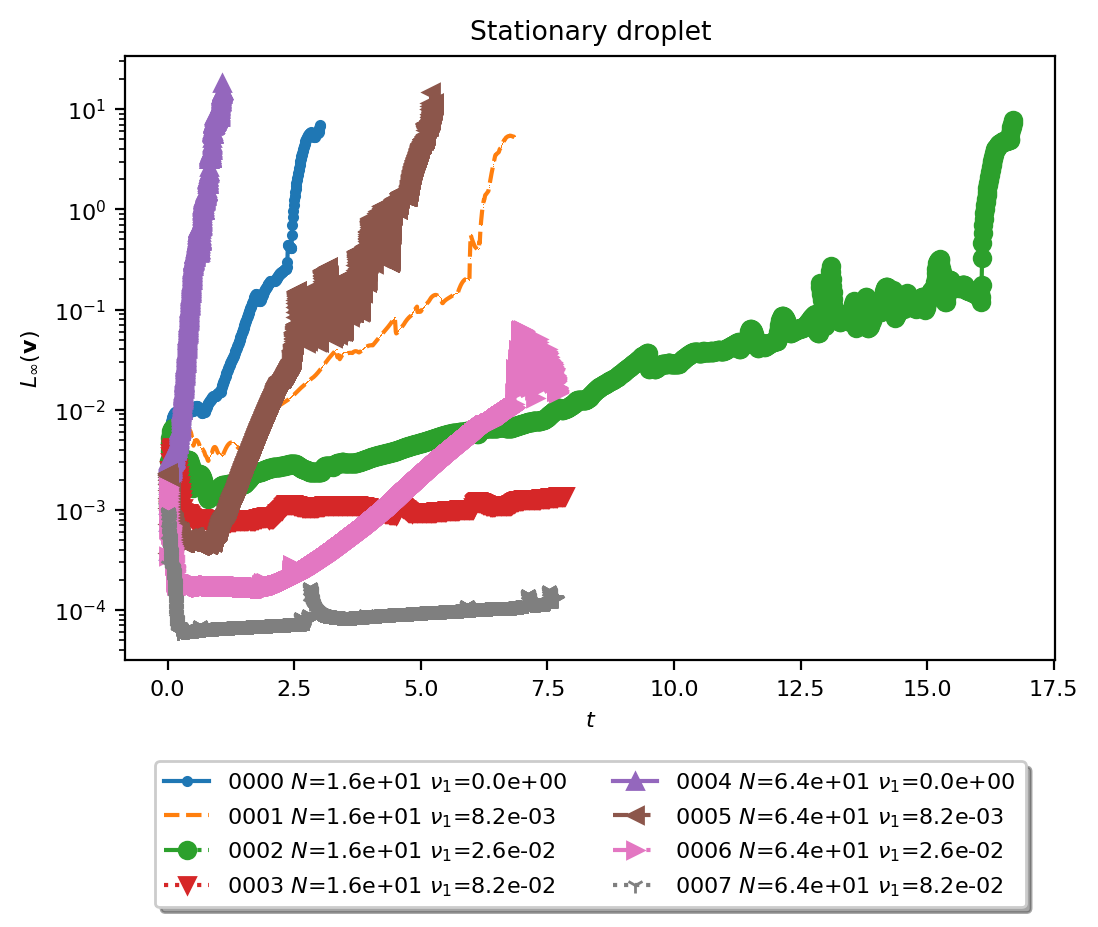

In [78]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df = popinet_2009_agglom.study_dataframe() 

plot_dframe(popinet_2009_df, popinet_2009_agglom, 
            title="Stationary droplet", 
            plotDict=plotDict)

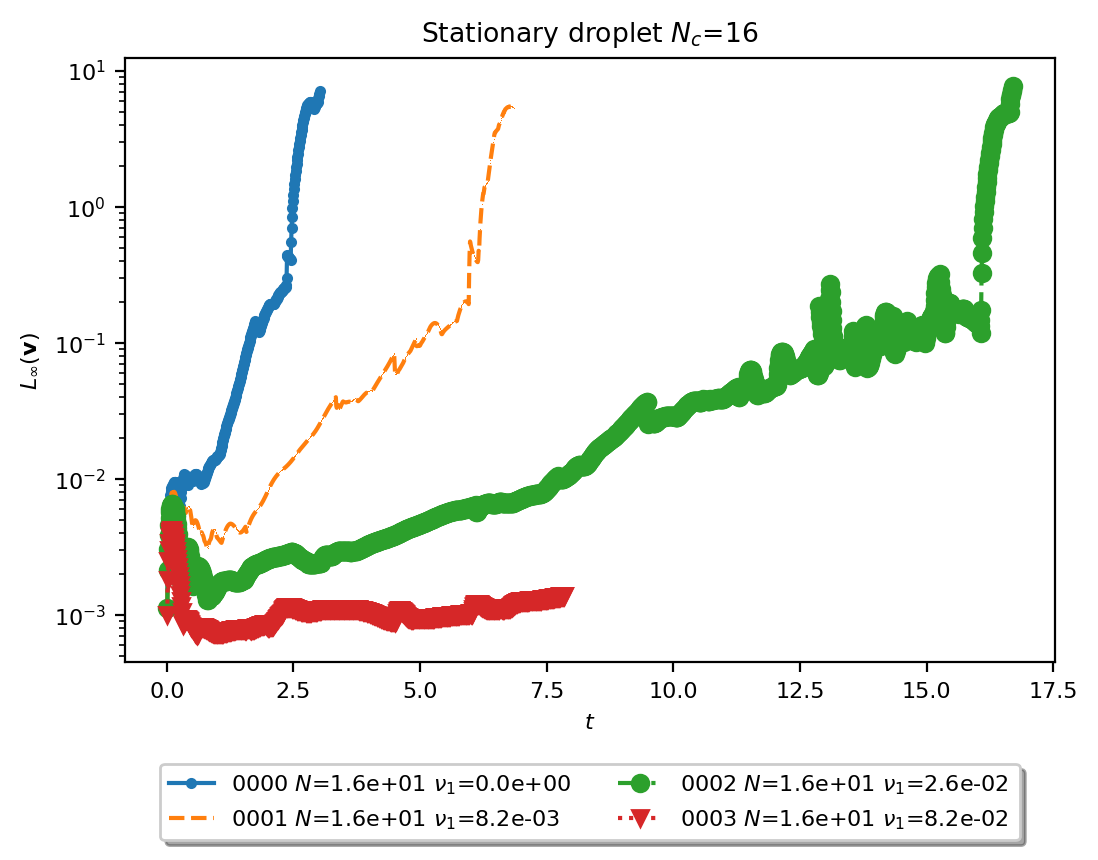

In [79]:
rcParams["figure.dpi"] = 200
idx = pd.IndexSlice
plot_dframe(popinet_2009_df.loc[idx[[16],:,:,:]],
            popinet_2009_agglom,
            title="Stationary droplet $N_c$=16", 
            plotDict=plotDict)

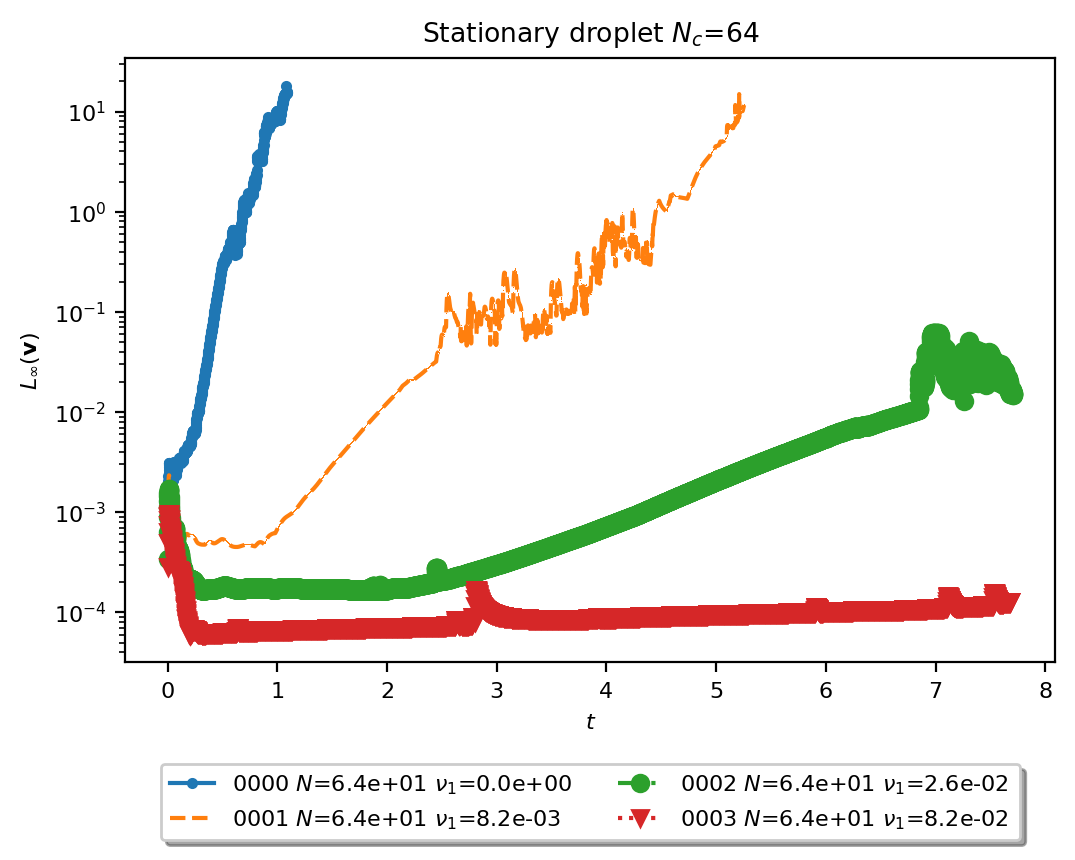

In [80]:
rcParams["figure.dpi"] = 200
plot_dframe(popinet_2009_df.loc[idx[[64],:,:,:]],
            popinet_2009_agglom,
            title="Stationary droplet $N_c$=64", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


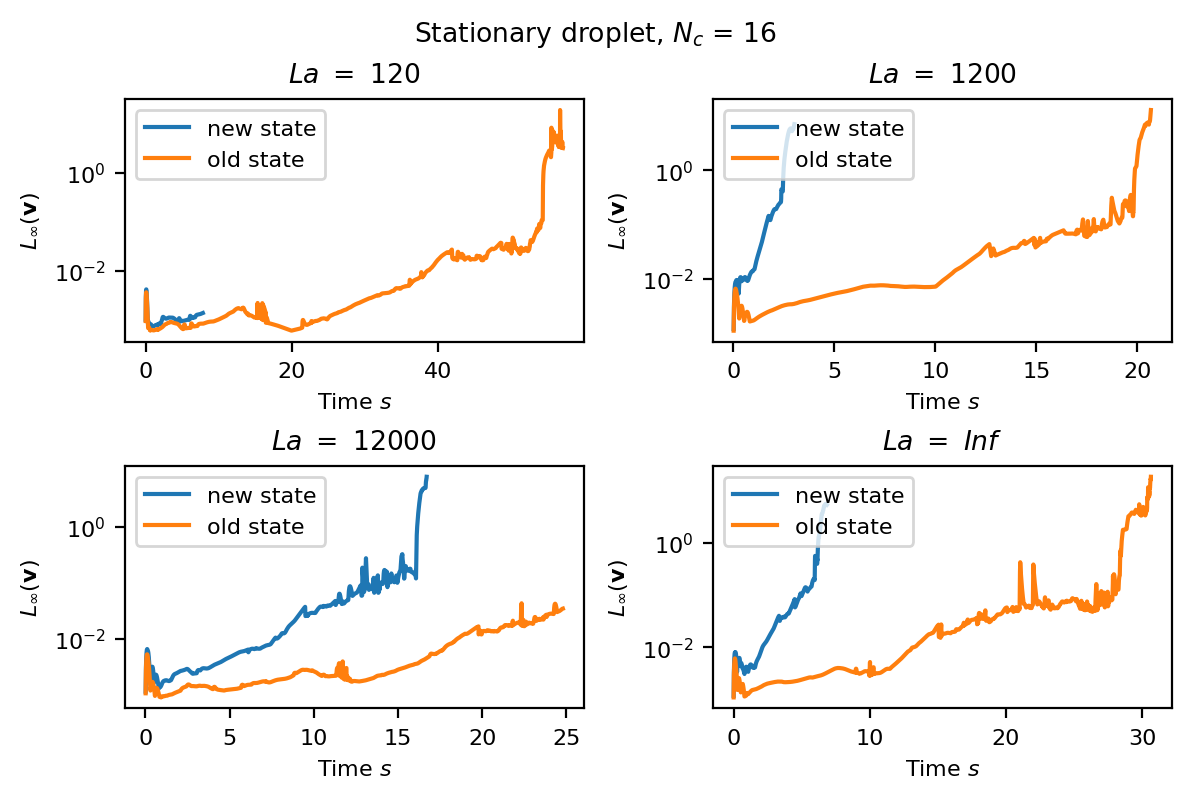

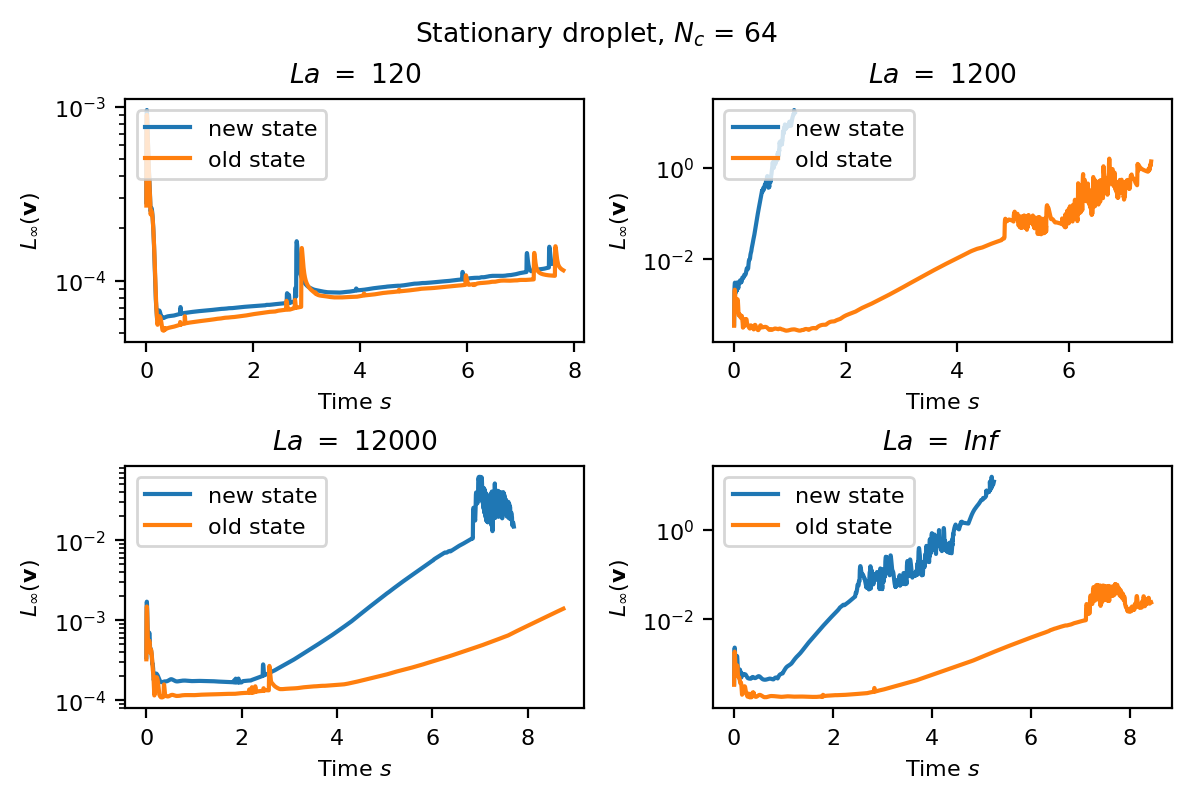

In [110]:
import matplotlib.pyplot as plt
old_state_df = pd.read_csv('saamplePaperConfig_stationaryDroplet_popinet2009.csv', header = 1 )
rcParams['figure.dpi'] = 200
rcParams['font.size'] = 8
import warnings

def plot_comparison(old_df, new_df, resolution):
    """Plots the L_inf(v) error and compares the old_df with new_df for all Laplace numbers for a 
    single mesh resolution."""
    
    # FIXME: We have to store the Laplace numbers and all other dimensionless numbers in the 
    #        secondary data, to prevent the need for listing them explicitly or re-calculating them.
    laplace_numbers = [120, 1200, 12000, "Inf"]
    viscosities = list(set(old_df["nu_droplet"]))

    N = int(len(viscosities)**0.5)
    
    fig, ax = plt.subplots(2,2)
    
    for i,viscosity in enumerate(viscosities): 
        new_state = new_df.loc[idx[[resolution],[viscosity],:]]
        old_state = old_df.loc[(old_df['resolution']==resolution)&(old_df['nu_droplet']==viscosity)]
        row = int(i / N)
        col = int(i % N)
        ax[row,col].plot(new_state['time'], new_state['Linf velocity error'], label='new state')
        ax[row,col].plot(old_state['time'], old_state['Linf velocity error'], label='old state')
        ax[row,col].legend(loc='upper left')
        ax[row,col].set_title(r"$La\ =\ %s$" % laplace_numbers[i])
        ax[row,col].set_yscale('log')
        ax[row,col].set_ylabel('$L_\infty(\mathbf{v})$')
        ax[row,col].set_xlabel('Time $s$')

    fig.tight_layout()      
    fig.subplots_adjust(top=0.88)
    fig.suptitle("Stationary droplet, $N_c$ = %s" % resolution)


old_resolutions = list(set(old_state_df["resolution"]))
old_resolutions.sort()
new_resolutions = list(set(popinet_2009_df.index.get_level_values("resolution")))
new_resolutions.sort()
resolutions = old_resolutions


if (old_resolutions != new_resolutions): 
    print("Resolutions available in the old data set = ", old_resolutions)
    print("Resolutions available in the new data set = ", new_resolutions)    
    warnings.warn("Old and new mesh resolutions are not equal, comparing the shorter resolution list!")
    
    if (len(old_resolutions) > len(new_resolutions)):
        resolutions = new_resolutions

for resolution in resolutions:
    plot_comparison(old_state_df, popinet_2009_df, resolution)